<a href="https://colab.research.google.com/github/AnkithCV/diabetes-prediction-system-/blob/main/Diabetes_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

Importing all the necessary modules needed to run the program

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

Accessing the dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

Data cleaning-removing null values, duplicates and outliers

In [ ]:
# Check for missing values
print(diabetes_dataset.isnull().sum())
# Check for duplicates
print(diabetes_dataset.duplicated().sum())
# Check for outliers
print(diabetes_dataset.describe())
# Handle missing values
diabetes_dataset = diabetes_dataset.dropna()
# Handle duplicates
diabetes_dataset = diabetes_dataset.drop_duplicates()
# Save cleaned data to a new CSV file
diabetes_dataset.to_csv("pima_diabetes_cleaned.csv", index=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPed

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Printing the number of positive and negative diabetes cases

In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 in the outcome column represents Non-Diabetic

1 represents Diabetic

In [ ]:
#Displaying the mean of all the values in the dataset grouped by the outcome
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
#X represents independent variables, Y represents dependent variables
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Visualisation- Scatter plot for each of the features

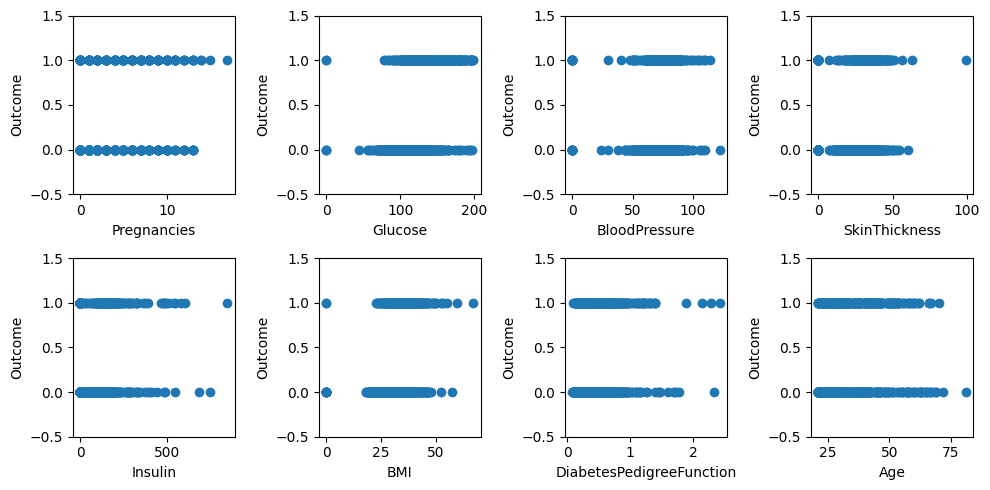

In [ ]:
# Select features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

# Iterate through features and plot each one
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(diabetes_dataset[feature], diabetes_dataset['Outcome'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Outcome')
    axs[row, col].set_ylim([-0.5, 1.5])

plt.tight_layout()
plt.show()

Data Visualisation-Heat Map

<Axes: >

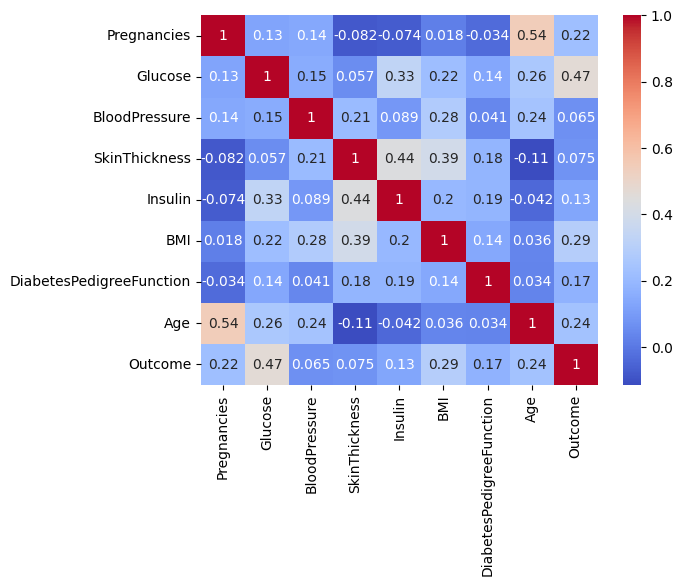

In [ ]:
# Calculate the correlation matrix
corr = diabetes_dataset.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

Data Standardization/ Normalization- The goal of data standardization is to transform the data to have a similar scale and distribution of the data. All elements in the dataset are converted to a value in the range of -1 to 1

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

Transformation- Converting the tables into array format

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Hyper parameter optimization
evaluateing all the possible combinations of hyperparameters specified in the parameter grid, and returns the hyperparameters that yield the best performance metric. SVM has different methods to run the model (rbf, poly,sigmoid and linear), we're performing grid search to identify which method works best with our dataset

In [ ]:

param_grid={'C':[0.1,1,100,1000],
'kernel':["rbf", "poly", "sigmoid", "linear"],
'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

Here Support vector with linear kernal gives highest accuracy

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,Y_test))

{'C': 1, 'degree': 1, 'kernel': 'linear'}
0.7727272727272727


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
svm_model=classifier.fit(X_train, Y_train)

Model Evaluation

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Accuracy Score

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [ ]:
Y_pred = classifier.predict(X)
f1 = f1_score(Y, Y_pred)
print("F1 score:", f1)

F1 score: 0.6497890295358649


Making the final Predictive System

In [ ]:


def predict_diabetes(Number_of_Pregnancies, Blood_glucose, Blood_pressure, Skin_thickess, Insulin, BMI, Diabetes_predigree_function, Age):
    # insulin, BMI, diabetes pedigree function and age
    input_data=[]
    input_data.append(Number_of_Pregnancies)
    input_data.append(Blood_glucose)
    input_data.append(Blood_pressure)
    input_data.append(Skin_thickess)
    input_data.append(Insulin)
    input_data.append(BMI)
    input_data.append(Diabetes_predigree_function)
    input_data.append(Age)

    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    # standardize the input data
    std_data = scaler.transform(input_data_reshaped)

    prediction = classifier.predict(std_data)

    if (prediction[0] == 0):
        output='The person is not diabetic'
    else:
        output='The person is diabetic'

    return output

inputs = [gr.inputs.Number(label="Number of Pregnancies"),
          gr.inputs.Number(label="Blood Glucose"),
          gr.inputs.Number(label="Blood Pressure"),
          gr.inputs.Number(label="Skin Thickness"),
          gr.inputs.Number(label="Insulin"),
          gr.inputs.Number(label="BMI"),
          gr.inputs.Number(label="Diabetes Pedigree Function"),
          gr.inputs.Number(label="Age")]

output = gr.outputs.Label()

gr.Interface(fn=predict_diabetes, inputs=inputs, outputs=output).launch()


<ipython-input-33-0e878fca9dfc>:31: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = [gr.inputs.Number(label="Number of Pregnancies"),
<ipython-input-33-0e878fca9dfc>:31: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = [gr.inputs.Number(label="Number of Pregnancies"),
<ipython-input-33-0e878fca9dfc>:32: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Blood Glucose"),
<ipython-input-33-0e878fca9dfc>:32: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Blood Glucose"),
<ipython-input-33-0e878fca9dfc>:33: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your componen

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>